In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import xml.etree.ElementTree as xet
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Read Data

In [4]:
df = pd.read_csv('labels.csv')
df.head()

,filepath,xmin,xmax,ymin,ymax
0,./annotations\Cars0.xml,226,419,125,173
1,./annotations\Cars1.xml,134,262,128,160
2,./annotations\Cars10.xml,140,303,5,148
3,./annotations\Cars100.xml,175,214,114,131
4,./annotations\Cars101.xml,167,240,202,220


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  433 non-null    object
 1   xmin      433 non-null    int64 
 2   xmax      433 non-null    int64 
 3   ymin      433 non-null    int64 
 4   ymax      433 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 17.0+ KB


In [6]:
# Define the Google Drive path
drive_path = '/content/drive/MyDrive/annotations/'

# Update the 'filepath' column in one go
df['filepath'] = df['filepath'].apply(lambda x: os.path.join(drive_path, x.replace('./annotations\\', '')))

# Display the updated DataFrame
df.head()

,filepath,xmin,xmax,ymin,ymax
0,/content/drive/MyDrive/annotations/Cars0.xml,226,419,125,173
1,/content/drive/MyDrive/annotations/Cars1.xml,134,262,128,160
2,/content/drive/MyDrive/annotations/Cars10.xml,140,303,5,148
3,/content/drive/MyDrive/annotations/Cars100.xml,175,214,114,131
4,/content/drive/MyDrive/annotations/Cars101.xml,167,240,202,220


In [7]:
filename = df['filepath'][0]
filename

'/content/drive/MyDrive/annotations/Cars0.xml'

In [8]:
import xml.etree.ElementTree as ET
def getFilename(filename):
    # Assuming that 'filename' is the full path to the XML file
    tree = ET.parse(filename)
    root = tree.getroot()

    # Get the filename from the XML
    filename_image = root.find('filename').text

    # Construct the full path to the image file in the 'images' folder
    filepath_image = os.path.join('/content/drive/MyDrive/images', filename_image)

    return filepath_image

In [9]:
getFilename(filename)

'/content/drive/MyDrive/images/Cars0.png'

In [10]:
image_path = list(df['filepath'].apply(getFilename))
image_path

['/content/drive/MyDrive/images/Cars0.png',
 '/content/drive/MyDrive/images/Cars1.png',
 '/content/drive/MyDrive/images/Cars10.png',
 '/content/drive/MyDrive/images/Cars100.png',
 '/content/drive/MyDrive/images/Cars101.png',
 '/content/drive/MyDrive/images/Cars102.png',
 '/content/drive/MyDrive/images/Cars103.png',
 '/content/drive/MyDrive/images/Cars104.png',
 '/content/drive/MyDrive/images/Cars105.png',
 '/content/drive/MyDrive/images/Cars106.png',
 '/content/drive/MyDrive/images/Cars107.png',
 '/content/drive/MyDrive/images/Cars108.png',
 '/content/drive/MyDrive/images/Cars109.png',
 '/content/drive/MyDrive/images/Cars11.png',
 '/content/drive/MyDrive/images/Cars110.png',
 '/content/drive/MyDrive/images/Cars111.png',
 '/content/drive/MyDrive/images/Cars112.png',
 '/content/drive/MyDrive/images/Cars113.png',
 '/content/drive/MyDrive/images/Cars114.png',
 '/content/drive/MyDrive/images/Cars115.png',
 '/content/drive/MyDrive/images/Cars116.png',
 '/content/drive/MyDrive/images/Cars117.

## Verify Image and Output

In [11]:
file_path = image_path[0]
file_path

'/content/drive/MyDrive/images/Cars0.png'

In [12]:
img = cv2.imread(file_path)

# cv2.namedWindow('example', cv2.WINDOW_NORMAL) # for resize
# cv2.imshow('example', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [13]:
# Create bounding box
# 226 419 125 173
# cv2.rectangle(img, (226,125), (419,173), (0,255,0), 3)
# cv2.namedWindow('example', cv2.WINDOW_NORMAL) # for resize
# cv2.imshow('example', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Preprocessing

In [14]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [15]:
labels = df.iloc[:,1:].values
data = []
output = []

for ind in range(len(image_path)):
    image = image_path[ind]
    img_arr = cv2.imread(image)
    h,w,d = img_arr.shape
    # Prepprocesing
    load_image = load_img(image,target_size=(224,224))
    load_image_arr = img_to_array(load_image)
    norm_load_image_arr = load_image_arr/255.0 # Normalization
    # Normalization to labels
    xmin,xmax,ymin,ymax = labels[ind]
    nxmin,nxmax = xmin/w,xmax/w
    nymin,nymax = ymin/h,ymax/h
    label_norm = (nxmin,nxmax,nymin,nymax) # Normalized output
    # Append
    data.append(norm_load_image_arr)
    output.append(label_norm)

In [16]:
label_norm

(0.18666666666666668, 0.6986666666666667, 0.396, 0.542)

In [17]:
load_image_arr

array([[[242., 247., 251.],
        [168., 175., 183.],
        [147., 161., 172.],
        ...,
        [101., 111., 120.],
        [ 89.,  99., 108.],
        [ 94., 104., 113.]],

       [[249., 250., 252.],
        [230., 233., 238.],
        [188., 196., 206.],
        ...,
        [ 99., 113., 124.],
        [ 83.,  97., 108.],
        [ 88., 102., 113.]],

       [[251., 250., 248.],
        [254., 254., 255.],
        [245., 250., 254.],
        ...,
        [ 99., 117., 131.],
        [ 82., 100., 114.],
        [ 92., 110., 124.]],

       ...,

       [[ 97.,  81.,  48.],
        [ 96.,  80.,  47.],
        [ 95.,  79.,  46.],
        ...,
        [101.,  87.,  58.],
        [103.,  89.,  60.],
        [ 98.,  84.,  55.]],

       [[104.,  79.,  57.],
        [100.,  78.,  54.],
        [ 96.,  77.,  44.],
        ...,
        [ 91.,  77.,  48.],
        [ 94.,  80.,  51.],
        [ 96.,  82.,  53.]],

       [[ 98.,  73.,  51.],
        [ 97.,  75.,  51.],
        [ 97.,  

In [18]:
X = np.array(data,dtype=np.float32)
y = np.array(output,dtype=np.float32)

In [19]:
X.shape, y.shape

((433, 224, 224, 3), (433, 4))

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((346, 224, 224, 3), (87, 224, 224, 3), (346, 4), (87, 4))

## Model

In [21]:
from tensorflow.keras.applications import MobileNetV2, InceptionV3, InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.models import Model

In [22]:
inception = InceptionV3(weights="imagenet",include_top=False,
                                     input_tensor=Input(shape=(224,224,3)))
inception.trainable=False

headmodel = inception.output
headmodel = Flatten()(headmodel)
headmodel = Dense(500,activation="relu")(headmodel)
headmodel = Dense(250,activation="relu")(headmodel)
headmodel = Dense(4,activation='sigmoid')(headmodel)

model = Model(inputs=inception.input,outputs=headmodel)

87910968/87910968 [==============================] - 0s 0us/step


In [23]:
# Compile Model
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

## Model Training

In [24]:
from tensorflow.keras.callbacks import TensorBoard

In [25]:
tfb = TensorBoard('object_detection')

In [26]:
# import tensorflow.keras.backend as K
# K.clear_session()

In [27]:
history = model.fit(x=x_train,y=y_train,batch_size=10,epochs=100,
                    validation_data=(x_test,y_test),callbacks=[tfb])

Epoch 1/100
35/35 [==============================] - 17s 207ms/step - loss: 0.1393 - accuracy: 0.0116 - val_loss: 0.1623 - val_accuracy: 0.0000e+00
Epoch 2/100
35/35 [==============================] - 2s 44ms/step - loss: 0.1480 - accuracy: 0.0058 - val_loss: 0.1428 - val_accuracy: 0.0000e+00
Epoch 3/100
35/35 [==============================] - 1s 41ms/step - loss: 0.1392 - accuracy: 0.0058 - val_loss: 0.1201 - val_accuracy: 0.0000e+00
Epoch 4/100
35/35 [==============================] - 1s 43ms/step - loss: 0.1197 - accuracy: 0.0000e+00 - val_loss: 0.1253 - val_accuracy: 0.0000e+00
Epoch 5/100
35/35 [==============================] - 1s 41ms/step - loss: 0.1158 - accuracy: 0.0000e+00 - val_loss: 0.1162 - val_accuracy: 0.0000e+00
Epoch 6/100
35/35 [==============================] - 1s 43ms/step - loss: 0.1105 - accuracy: 0.0000e+00 - val_loss: 0.1129 - val_accuracy: 0.0000e+00
Epoch 7/100
35/35 [==============================] - 1s 41ms/step - loss: 0.1062 - accuracy: 0.0000e+00 - val_

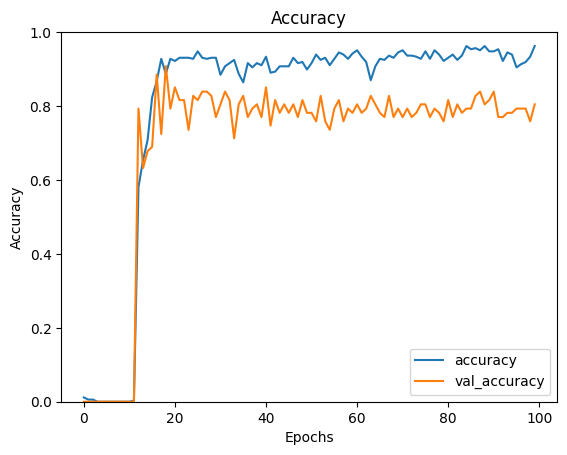

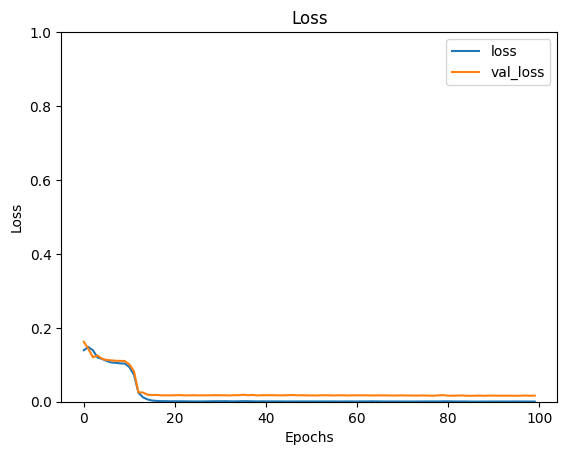

In [28]:
accuracy_df = pd.DataFrame({'accuracy': history.history['accuracy'], 'val_accuracy': history.history['val_accuracy']})
loss_df = pd.DataFrame({'loss': history.history['loss'], 'val_loss': history.history['val_loss']})

# Plot accuracy
accuracy_df.plot(kind='line')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Plot loss
loss_df.plot(kind='line')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 1)
plt.show()

In [29]:
# Log
model.save('./model/object_detection.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
from tensorflow.keras.models import load_model

model = load_model("./model/object_detection.h5")

## Prediction

In [31]:
# Pipeline
def object_detection(path):

    # Read image
    image = load_img(path) # PIL object
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))

    # Data preprocessing
    image_arr_224 = img_to_array(image1)/255.0 # Convert to array & normalized
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)

    # Make predictions
    coords = model.predict(test_arr)

    # Denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)

    # Draw bounding on top the image
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

1/1 [==============================] - 3s 3s/step
(208, 282) (957, 519)


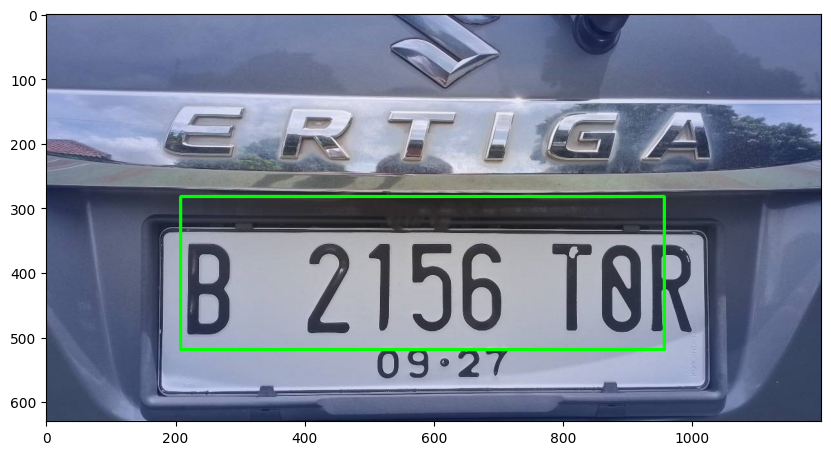

In [32]:
path = "platindo.jpg"
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

## Optical Character Recognition - OCR

In [33]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (8,070 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [34]:
import pytesseract as pt

1/1 [==============================] - 0s 27ms/step
(208, 282) (957, 519)


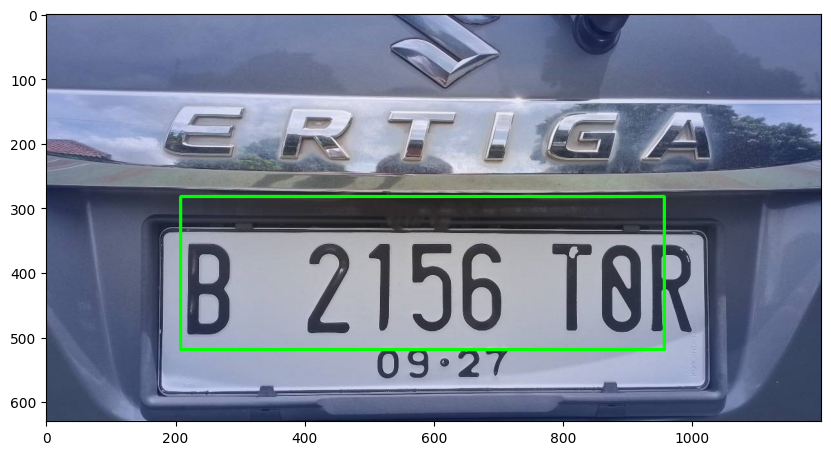

In [35]:
path = "platindo.jpg"
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [36]:
img = np.array(load_img(path))
xmin, xmax, ymin, ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]

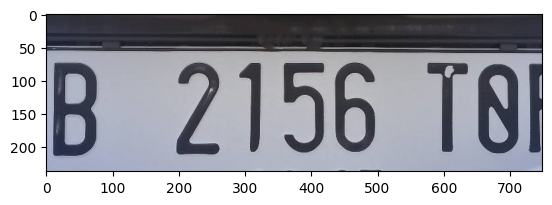

In [37]:
plt.imshow(roi)
plt.show()

In [38]:
# Extract Text from Image
text = pt.image_to_string(roi)
print(text)

 

B 2196 I0I



## Training 2

In [39]:
# history = model.fit(x=x_train,y=y_train,batch_size=10,epochs=200,
                    # validation_data=(x_test,y_test),callbacks=[tfb],initial_epoch=100)

In [40]:
# pd.DataFrame(history.history).plot(kind='line')

In [41]:
# path = "./images/Cars127.png"
# image, cods = object_detection(path)

# plt.figure(figsize=(10,8))
# plt.imshow(image)
# plt.show()

In [42]:
# path = "./images/Cars0.png"
# image, cods = object_detection(path)

# plt.figure(figsize=(10,8))
# plt.imshow(image)
# plt.show()

# img = np.array(load_img(path))
# xmin, xmax, ymin, ymax = cods[0]
# roi = img[ymin:ymax,xmin:xmax]

# plt.imshow(roi)
# plt.show()

In [43]:
# text = pt.image_to_string(roi)
# print(text)